# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda

Vamos trabalhar com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import patsy

In [3]:
df = pd.read_csv('previsao_de_renda.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

1. Ajuste um modelo para prever log(renda) considerando todas as covariáveis disponíveis.
    - Utilizando os recursos do Patsy, coloque as variáveis qualitativas como *dummies*.
    - Mantenha sempre a categoria mais frequente como casela de referência
    - Avalie os parâmetros e veja se parecem fazer sentido prático.  


2. Remova a variável menos significante e analise:
    - Observe os indicadores que vimos, e avalie se o modelo melhorou ou piorou na sua opinião.
    - Observe os parâmetros e veja se algum se alterou muito.  


3. Siga removendo as variáveis menos significantes, sempre que o *p-value* for menor que 5%. Compare o modelo final com o inicial. Observe os indicadores e conclua se o modelo parece melhor. 
    

In [1]:
# Transformar a variável resposta (renda) em log(renda)
df['log_renda'] = np.log(df['renda'])

# Criar a fórmula usando Patsy e incluindo todas as variáveis explicativas
formula = 'log_renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X e y)
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:04:58   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [53]:
# Identificar a categoria mais frequente em cada variável categórica
categorias_mais_frequentes = {}
for col in df.select_dtypes(include=['object', 'bool']).columns:
    categorias_mais_frequentes[col] = df[col].mode()[0]

# Imprimir as categorias mais frequentes
print("Categorias mais frequentes em cada variável:")
for col, cat in categorias_mais_frequentes.items():
    print(f'{col}: {cat}')

# Transformar a variável resposta (renda) em log(renda)
df['log_renda'] = np.log(df['renda'])

# Criar a fórmula utilizando todas as variáveis categóricas e numéricas
formula = 'log_renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + \
           C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + \
           qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X e y)
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

# Avaliar a influência das variáveis categóricas
coef = model.params
coef_categorias = coef.filter(like='C(')
print("\nCoeficientes das variáveis categóricas:")
print(coef_categorias)

# Identificar a variável categórica com maior impacto (coeficiente absoluto mais alto)
maior_influencia = coef_categorias.abs().idxmax()
print(f"\nA variável categórica com maior influência é: {maior_influencia}")

Categorias mais frequentes em cada variável:
data_ref: 2015-01-01
sexo: F
posse_de_veiculo: False
posse_de_imovel: True
tipo_renda: Assalariado
educacao: Secundário
estado_civil: Casado
tipo_residencia: Casa
                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        21:14:13   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
  

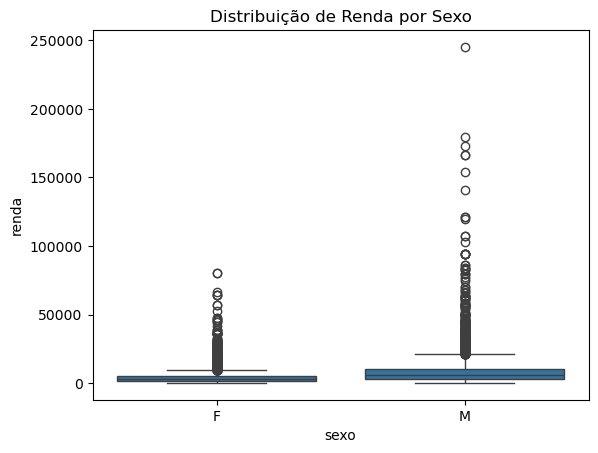

In [19]:
# Comparar a distribuição da renda entre homens e mulheres
sns.boxplot(x='sexo', y='renda', data=df)
plt.title('Distribuição de Renda por Sexo')
plt.show()

#### Análise do Modelo:
O modelo ajustado apresenta um R-squared de 0.357, indicando que aproximadamente 35.7% da variabilidade no logaritmo da renda pode ser explicada pelas variáveis do modelo.

##### Coeficiente de C(sexo)[T.M] (0.7874):
Esse coeficiente é o mais alto e sugere que, mantendo todas as outras variáveis constantes, homens (M) têm um logaritmo da renda maior, em média, do que mulheres (F, a categoria de referência). Esse resultado é altamente significativo (p-valor < 0.001).
Outros Coeficientes Significativos:

##### C(posse_de_imovel)[T.True] (0.0829): 
Posse de imóvel também está associada a um aumento no logaritmo da renda.
##### C(tipo_renda)[T.Empresário] (0.1551): 
Ser empresário, em comparação com ser assalariado (referência), está associado a uma maior renda.

##### C(estado_civil)[T.Separado] (0.3265) e C(estado_civil)[T.Viúvo] (0.3689): 
Separados e viúvos, em comparação com casados, têm uma renda maior.

##### tempo_emprego (0.0617): Cada ano adicional de tempo de emprego está associado a um aumento significativo no logaritmo da renda.
Variáveis com Impacto Negativo:

##### C(tipo_renda)[T.Pensionista] (-0.3087): 
Pensionistas tendem a ter uma renda significativamente menor do que assalariados.

##### qtd_filhos (-0.2658): 
Cada filho adicional está associado a uma redução no logaritmo da renda.

##### Categoria de Sexo como a Mais Influente: 
O fato de C(sexo)[T.M] ser a variável categórica com maior influência significa que o sexo é uma variável muito relevante na determinação da renda, com homens tendo uma vantagem substancial em comparação com mulheres na amostra analisada.

#### Conclusões
Este modelo sugere que gênero, posse de imóvel, estado civil, tipo de renda e tempo de emprego são fatores importantes para explicar as diferenças de renda. A análise também destaca a importância de se considerar diferentes categorias dentro das variáveis para uma compreensão mais completa da dinâmica da renda.

___

In [31]:
# Remover as cinco variáveis menos significativas da fórmula
formula_updated = 'log_renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + C(tipo_renda) + C(educacao) + C(estado_civil) + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X e y) com a fórmula atualizada
y, X = patsy.dmatrices(formula_updated, data=df, return_type='dataframe')

# Ajustar o modelo de regressão linear
model_updated = sm.OLS(y, X).fit()

# Exibir o resumo do modelo atualizado
print(model_updated.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     382.7
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:29:05   Log-Likelihood:                -13572.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12408   BIC:                         2.732e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

***O AIC do modelo atual é ligeiramente menor (27,180 vs. 27,190). Uma redução no AIC, mesmo que pequena, indica uma melhora no modelo em termos de equilíbrio entre ajuste e complexidade. Isso significa que o modelo com menos variáveis está oferecendo uma adequação semelhante ao modelo anterior, mas com maior simplicidade.***

___

In [48]:
# Atualizar a fórmula removendo variáveis menos significativas
formula = 'log_renda ~ C(sexo) + C(posse_de_veiculo) + C(posse_de_imovel) + \
           C(tipo_renda) + qtd_filhos + idade + tempo_emprego + qt_pessoas_residencia'

# Criar as matrizes de design (X e y)
y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

# Ajustar o modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_renda   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     615.9
Date:                Sat, 10 Aug 2024   Prob (F-statistic):               0.00
Time:                        20:26:14   Log-Likelihood:                -13610.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12415   BIC:                         2.733e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

#### Comparação e Conclusão:
***R-squared e Adj. R-squared:***
O R-squared do modelo inicial é ligeiramente maior (0.357) em comparação com o modelo atual (0.353), o que sugere que o modelo inicial pode explicar um pouco melhor a variabilidade da log_renda.

***F-statistic:***
O F-statistic do modelo atual é muito maior (615.9) comparado ao modelo inicial (287.5). Isso indica que o modelo atual tem um ajuste mais geral e melhor em termos de significância global.

***AIC e BIC:***
O AIC e o BIC são um pouco mais altos no modelo atual, indicando que o modelo pode ser mais complexo devido ao maior número de variáveis.
Número de Observações:

O número de observações é o mesmo para ambos os modelos, então não há impacto na comparação devido ao tamanho da amostra.

***Coeficientes e Significância:***
O modelo atual removeu algumas variáveis com p-values altos (como C(educacao), C(tipo_residencia) e qt_pessoas_residencia), o que pode melhorar a interpretação do modelo e a qualidade geral do ajuste. A inclusão de qtd_filhos como significativa é um novo ponto relevante no modelo atual.

***Conclusão:***
Embora o R-squared tenha diminuído ligeiramente, o aumento do F-statistic e a remoção de variáveis não significativas indicam que o modelo atual é um pouco mais ajustado e específico. Isso sugere que o modelo atual pode ser considerado uma melhoria em termos de simplicidade e relevância das variáveis, apesar da leve redução no R-squared.